In [1]:
#Imports 
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

2024-04-07 18:12:27.677489: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 18:12:28.517328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the spreadsheet
data = pd.read_csv("rfp2017-results-20240324-173734.csv")
# Get rid of all the newline escape characters
data = data.rename(columns=lambda x: x.replace('\n', ''), inplace=False)
column_names = data.columns.tolist()

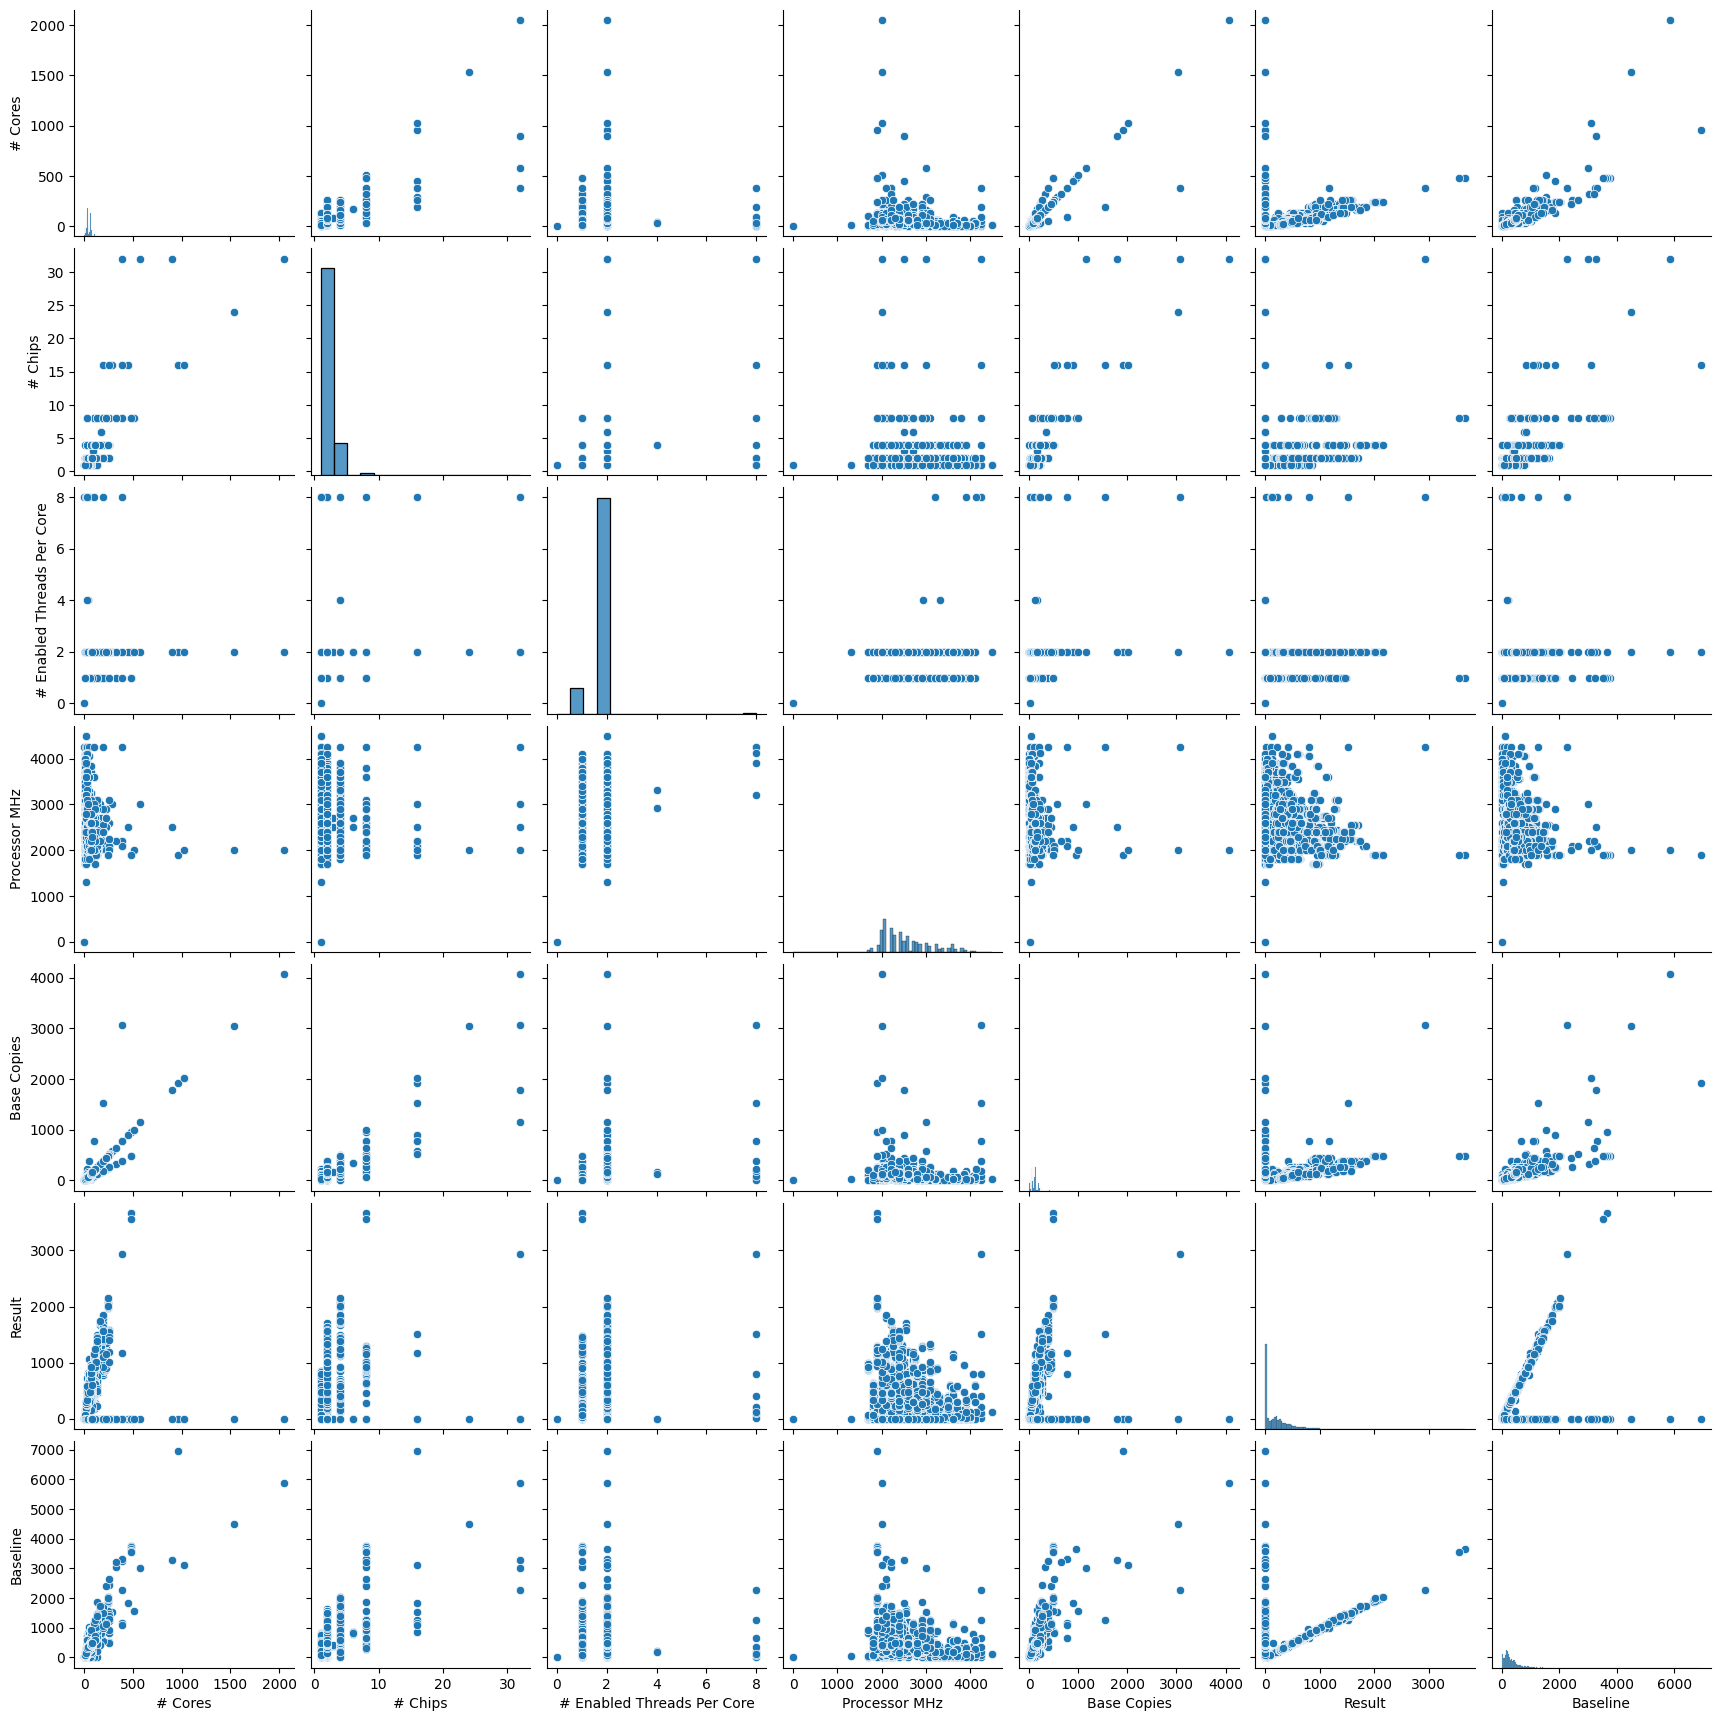

In [3]:
# Build pair plots
# Define a function to create the pairplot for each subset of features
def plot_correlations(feature_subsets):
    sns.pairplot(feature_subsets)
    plt.show()  # Display the pairplot

# Define a list of feature subsets (adjust based on your needs)
feature_subsets = data.select_dtypes(include=[np.number])
#feature_subsets = feature_subsets.drop('Column name to drop', axis=1)
feature_subsets = feature_subsets[list(feature_subsets.columns)[:7]]

foo = feature_subsets.columns.tolist()

# Call the function to generate pairplots for each subset
plot_correlations(feature_subsets)  # Copy the dataframe to avoid modifications

In [100]:
# Clean the data

# Filter down to certain configurations
features = data[data['Baseline'] > 0 ]

# Get around the copy warning
fc = features.copy()

# Drop certain rows based on column values
#features = features[~features['Processor'].str.contains('SPARC')]
#features = features[~features['Processor'].str.contains('Intel')]
#features = features[~features['Processor'].str.contains('AMD')]
#features = features[~features['Processor'].str.contains('Ampere')]

# Drop non-numeric columns
features = fc.select_dtypes(include=[np.number])

# Define a list of feature subsets (adjust based on your needs)
features = features[list(features.columns)[:7]]

#features = features.drop('License', axis=1)
#features = features.drop('Baseline', axis=1)
features = features.drop('Result', axis=1)

# Add features including categorical variables
#features = pd.concat([features, fc['3rd Level Cache']], axis=1)
features = pd.concat([features, fc['CPU(s) Orderable'].astype(str)], axis=1)
# Clean up CPU(s) orderable
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 CPU chip; 2, 3, 4, .. 6 cores', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 Chips', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 xhip', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 Chip', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1 chips', '1 chip')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1-2 chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1.2 chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2 chip(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 Chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chip', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chip(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2 (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips (chip)s', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips chips', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips(s)', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chipss', '1,2 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1, 2, 4 chip(s)', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2 chips, 4 chip(s)', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,4 (chip)s', '1,2,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 Chips', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 chip', '1,2,3,4 chips')
features['CPU(s) Orderable'] = features['CPU(s) Orderable'].str.replace('1,2,3,4 chipss', '1,2,3,4 chips')

foo = features['CPU(s) Orderable'].unique()
foo.sort()

#features = pd.concat([features, fc['Operating System']], axis=1)
# One Hot Encoding of Intel processors
features["Is_Intel"] = fc["Processor"].str.contains("Intel", case=False)
features["Is_Intel"] = features["Is_Intel"].astype(int)
# One Hot Encoding of AMD processors
features["Is_AMD"] = fc["Processor"].str.contains("AMD", case=False)
features["Is_AMD"] = features["Is_AMD"].astype(int)
# One Hot Encoding of processor type
features["Is_Core"] = fc["Processor"].str.contains("Core", case=False)
features["Is_Core"] = features["Is_Core"].astype(int)
features["Is_Pentium"] = fc["Processor"].str.contains("Pentium", case=False)
features["Is_Pentium"] = features["Is_Pentium"].astype(int)
features["Is_Xeon"] = fc["Processor"].str.contains("Xeon", case=False)
features["Is_Xeon"] = features["Is_Xeon"].astype(int)
features["Is_EPYC"] = fc["Processor"].str.contains("EPYC", case=False)
features["Is_EPYC"] = features["Is_EPYC"].astype(int)

# One Hot Encoding of OS name
features["Is_CentOS"] = fc["Operating System"].str.contains("CentOS", case=False)
features["Is_CentOS"] = features["Is_CentOS"].astype(int)
features["Is_Solaris"] = fc["Operating System"].str.contains("Solaris", case=False)
features["Is_Solaris"] = features["Is_Solaris"].astype(int)
features["Is_RedHat"] = fc["Operating System"].str.contains("Red Hat", case=False)
features["Is_RedHat"] = features["Is_RedHat"].astype(int)
features["Is_SUSE"] = fc["Operating System"].str.contains("SUSE", case=False)
features["Is_SUSE"] = features["Is_SUSE"].astype(int)
features["Is_Ubuntu"] = fc["Operating System"].str.contains("Ubuntu", case=False)
features["Is_Ubuntu"] = features["Is_Ubuntu"].astype(int)

# Encode each level of cache as a number
features['1LC_MB'] = fc['1st Level Cache'].str.extract('(\d+)').astype(float)
features['2LC_MB'] = fc['2nd Level Cache'].str.extract('(\d+)').astype(float)
features['3LC_MB'] = fc['3rd Level Cache'].str.extract('(\d+)').astype(float)

feature_list = features.columns.tolist()

features = features[feature_list].dropna()

# Renumber the indices of the data frame
features = features.reset_index(drop=True)

In [101]:
# One-hot encoding of CPU configuration
ohe_name = 'CPU(s) Orderable'
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(pd.DataFrame(features[ohe_name]))
encoded_data = ohe.transform(pd.DataFrame(features[ohe_name]))
ohe_columns = ohe.get_feature_names_out()
ohe_df = pd.DataFrame(encoded_data, columns=ohe_columns)
features = features.drop(ohe_name, axis=1)

In [70]:
# One-hot encoding of another feature
ohe_name = '3rd Level Cache'
ohe_tlc = OneHotEncoder(sparse_output=False)
ohe_tlc.fit(pd.DataFrame(features[ohe_name]))
encoded_tlc = ohe_tlc.transform(pd.DataFrame(features[ohe_name]))
ohe_tlc_columns = ohe_tlc.get_feature_names_out()
ohe_tlc = pd.DataFrame(encoded_tlc, columns=ohe_tlc_columns)

features = features.drop(ohe_name, axis=1)

In [7]:
# One-hot encoding of Memory Type
ohe_name = 'Memory Type'
ohe_mt = OneHotEncoder(sparse_output=False)
ohe_mt.fit(pd.DataFrame(features[ohe_name]))
encoded_mt = ohe_mt.transform(pd.DataFrame(features[ohe_name]))
ohe_mt_columns = ohe_mt.get_feature_names_out()
ohe_mt = pd.DataFrame(encoded_mt, columns=ohe_mt_columns)

features = features.drop(ohe_name, axis=1)

In [102]:
# Split the predictors from the performance
# We have the features, merge with the one hot encoded values
fc = features.reset_index()
#ohe_df = ohe_df.reset_index()
#ohe_pv = ohe_pv.reset_index()
#ohe_mt = ohe_mt.reset_index()
#ohe_oem = ohe_oem.reset_index()
#ohe_gt = ohe_gt.reset_index()

#fc = pd.concat([fc, ohe_df, ohe_pv, ohe_mt, ohe_oem, ohe_gt], axis=1)
#fc = pd.concat([fc, ohe_df, ohe_os], axis=1)
#fc = pd.concat([fc, ohe_df], axis=1)
#fc = pd.concat([fc, ohe_df, ohe_tlc], axis=1)
fc = pd.concat([fc, ohe_df], axis=1)
features = fc.copy()
target = features['Baseline']
features = features.drop('Baseline', axis=1)
features.dtypes

index                                         int64
# Cores                                       int64
# Chips                                       int64
# Enabled Threads Per Core                    int64
Processor MHz                                 int64
Base Copies                                   int64
Is_Core                                       int64
Is_Pentium                                    int64
Is_Xeon                                       int64
Is_EPYC                                       int64
Is_CentOS                                     int64
Is_Solaris                                    int64
Is_RedHat                                     int64
Is_SUSE                                       int64
Is_Ubuntu                                     int64
1LC_MB                                      float64
2LC_MB                                      float64
3LC_MB                                      float64
CPU(s) Orderable_1 chip                     float64
CPU(s) Order

In [103]:
# Split the data, train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [107]:
# Create a network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu"),  # Input layer with 256 neurons
    tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation="relu"),  # Hidden layer with 32 neurons
    #tf.keras.layers.Dense(16, activation="relu"),  # Hidden layer with 16 neurons
    tf.keras.layers.Dense(1)                       # Output layer for single prediction
])

# Compile and train it
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500


257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75929.3203 - mean_absolute_error: 175.8761 - val_loss: 26335.4219 - val_mean_absolute_error: 102.7253
Epoch 2/500
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 27744.8477 - mean_absolute_error: 106.4501 - val_loss: 22078.9590 - val_mean_absolute_error: 87.5334
Epoch 3/500
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 24237.5918 - mean_absolute_error: 95.5347 - val_loss: 18172.5547 - val_mean_absolute_error: 76.2943
Epoch 4/500
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 21445.3516 - mean_absolute_error: 92.4190 - val_loss: 13788.7715 - val_mean_absolute_error: 75.7126
Epoch 5/500
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 20349.5879 - mean_absolute_error: 86.5328 - val_loss: 26124.5938 - val_mean_absolute_error: 119.0943
Epoch 6/500
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 22223.6504 - mean_absolute_error: 90.7272 - val_loss: 13381.2500 - val_mean_absolute_error: 84.1300
Epoch 7/500
257/257 ━━━━━━━━━━━━

In [108]:
# Evaluate it
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test mean absolute error:", test_mae)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1570.2782 - mean_absolute_error: 23.8742
Test loss: 1925.673095703125
Test mean absolute error: 24.875070571899414


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


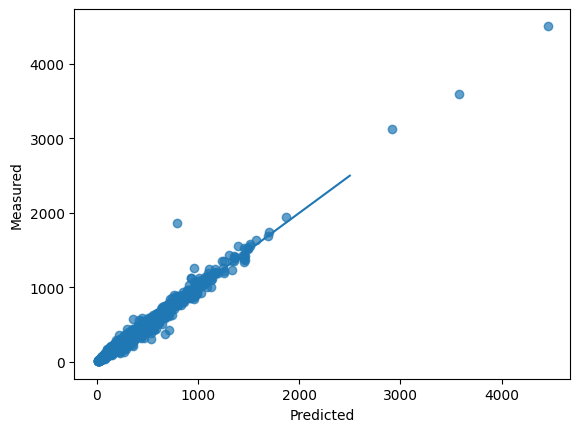

In [109]:
# Use it to predict
#new_config = pd.DataFrame([{"Meta Power Power in Watts [Power in Watts]": 134.116,
#                            "Launch Year": 2021,
#                            "Total System Memory (GB)": 32,
#                            "Memory Speed   (Freq)": 4800,
#                            "Core Type 1 # of Cores": 6,
#                            "Core Type 1 TDP/Base Frequency (Ghz)": 3.4}])

#prediction = model.predict(new_config)
prediction = model.predict(X_test)
#print("Predicted performance:", prediction)

# Compare predictions vs. actual in the test data
foo = X_test.copy()
foo['Predicted'] = prediction
foo['Measured'] = y_test

# Plot predicted vs. Actual
import matplotlib.pyplot as plt
plt.scatter(foo['Predicted'], foo['Measured'], alpha=0.7)
plt.plot([0,2500], [0,2500])
plt.xlabel("Predicted")
plt.ylabel("Measured")
plt.show()

In [110]:
model.save('speccpu17mt_tf_model.keras')
model.save_weights('speccpu17mt_tf_model_weights.ckpt.weights.h5')